# Dike Model Analysis

In [1]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Visual Analysis

In [3]:
experiments, outcomes = load_results('./results/openexplor_problem1.tar.gz')

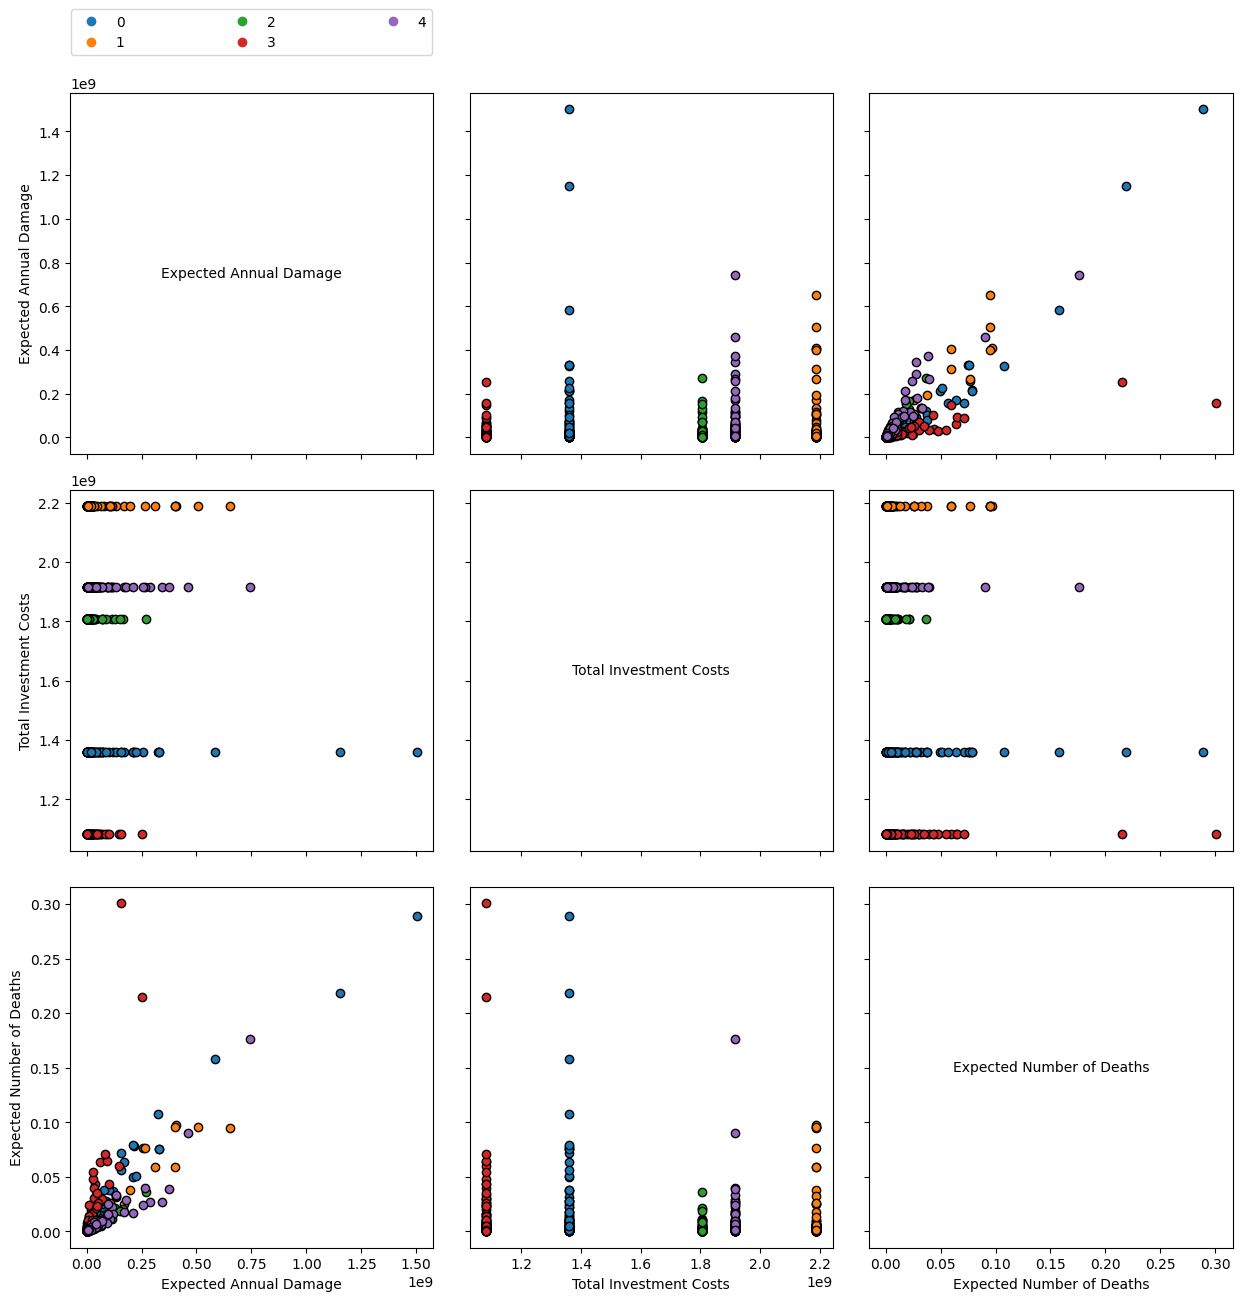

In [4]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

## Scenario discovery

In [5]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,104,64.120757,1.0,0.089590,205.465104,10.0,0.246512,52.451266,10.0,0.390192,...,10,6,8,6,4,3,1,5,0,dikesnet
1,53,202.120383,1.0,0.705557,315.497649,10.0,0.118661,326.738449,1.0,0.932178,...,10,6,8,6,4,3,1,6,0,dikesnet
2,8,204.906192,1.5,0.836553,273.795430,10.0,0.925029,69.337754,10.0,0.209054,...,10,6,8,6,4,3,1,7,0,dikesnet
3,61,253.150239,10.0,0.020861,238.316826,1.5,0.846640,114.244259,1.5,0.956519,...,10,6,8,6,4,3,1,8,0,dikesnet
4,127,297.031663,10.0,0.961866,212.877592,1.0,0.802209,196.252769,1.0,0.914689,...,10,6,8,6,4,3,1,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,56,291.563368,10.0,0.431115,164.479484,10.0,0.291513,297.838212,10.0,0.468498,...,7,4,7,2,9,1,4,100,4,dikesnet
496,57,237.680887,1.5,0.074035,139.103986,10.0,0.580457,142.645907,1.5,0.822234,...,7,4,7,2,9,1,4,101,4,dikesnet
497,94,343.096975,10.0,0.407619,91.815598,10.0,0.617257,128.080142,1.5,0.171735,...,7,4,7,2,9,1,4,102,4,dikesnet
498,106,79.399569,1.5,0.517367,72.680038,1.5,0.211851,338.968587,1.0,0.725774,...,7,4,7,2,9,1,4,103,4,dikesnet


In [6]:
# clean up experiments
X = experiments.iloc[:, 0:50]

In [7]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])

In [8]:
# Calculate the 10th percentile
threshold = np.percentile(outcomes['Expected Annual Damage'], 20) 
# Show threshold
print(f"The threshold for 10% worst outcomes for expected annual damage equals {threshold}.")

The threshold for 10% worst outcomes for expected annual damage equals 1472947.4749534987.


In [9]:
# Get column to optimise
opt = outcomes['Expected Annual Damage']
# To dataframe
opt = pd.DataFrame(opt)

In [10]:
opt

,0
0,5.843316e+07
1,1.207075e+08
2,1.191349e+06
3,5.823595e+08
4,6.454333e+06
...,...
495,1.001653e+07
496,8.186514e+06
497,4.301368e+07
498,7.192598e+06


In [11]:
opt['Expected Annual Damage'] = np.where(opt[0] < threshold, 1, 0)

In [12]:
opt

,0,Expected Annual Damage
0,5.843316e+07,0
1,1.207075e+08,0
2,1.191349e+06,1
3,5.823595e+08,0
4,6.454333e+06,0
...,...,...
495,1.001653e+07,0
496,8.186514e+06,0
497,4.301368e+07,0
498,7.192598e+06,0


In [13]:
y = opt['Expected Annual Damage'].to_numpy()

In [14]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [15]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.05)

In [16]:
box = sd_alg.find_box()

/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


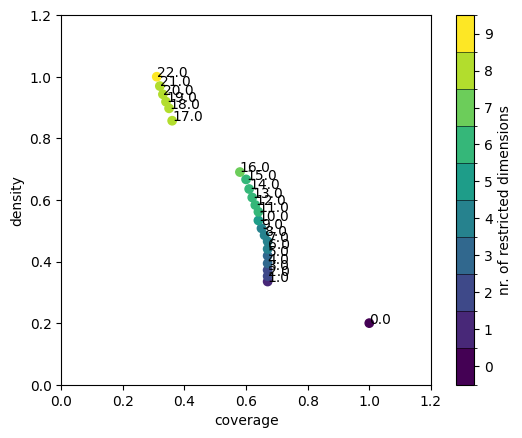

In [17]:
box.show_tradeoff(annotated=True)
plt.show()